<a href="https://colab.research.google.com/github/raisaksh1/Recommendation/blob/main/Recipes_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
import pandas as pd

chunk_size = 100000
df = pd.DataFrame()

for chunk in pd.read_csv('/content/recipes.csv', chunksize=chunk_size, on_bad_lines='skip', quoting=3):  # Handle problematic lines
    df = pd.concat([df, chunk], ignore_index=True)

print(df)

                                                RecipeId  \
0                                                   1533   
1                                                    NaN   
2       cook chicken with its marinade with tomatoes ...   
3                                                    NaN   
4       and blend on high speed for about one minute ...   
...                                                  ...   
22553          ""Drizzle mixture over cooled brownies.""   
22554   a little at a time making sure it blends well...   
22555                                                NaN   
22556                                                NaN   
22557    swirl slightly to create a marble appearance.""   

                                               Name  \
0                                            Dancer   
1                                               NaN   
2                                      uncovered.""   
3                                               NaN   
4   

In [ ]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"""c(""""https://img.sndimg.com/food/image/upload/...",h_416,c_fit,...,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_22...,"""""https://img.sndimg.com/food/image/upload/w_555",h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20...,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cook chicken with its marinade with tomatoes ...,"uncovered.""""","""""Remove chicken pieces from the sauce and se...",bring to boil,and cook,"covered over low heat for 15 minutes.""""","""""Return chicken and add raisins","cashews and almonds; mix well.""""","""""Simmer","covered for 5 minutes.""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,and blend on high speed for about one minute ...,"""""Alternatively",put all ingredients in a glass jar,cover tightly with the lid and shake well un...,"""""Lay the kebabs in a long",shallow baking pan or on a non-metal tray,making sure they lie flat. Evenly pour the ma...,turning them once so that the tofu and vegeta...,"""""Refrigerate the kebabs for three to eight h...","occasionally spooning the marinade over them.""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22558 entries, 0 to 22557
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RecipeId                    15016 non-null  object
 1   Name                        13411 non-null  object
 2   AuthorId                    11898 non-null  object
 3   AuthorName                  10885 non-null  object
 4   CookTime                    9910 non-null   object
 5   PrepTime                    8997 non-null   object
 6   TotalTime                   8204 non-null   object
 7   DatePublished               7314 non-null   object
 8   Description                 6469 non-null   object
 9   Images                      5758 non-null   object
 10  RecipeCategory              5134 non-null   object
 11  Keywords                    4553 non-null   object
 12  RecipeIngredientQuantities  4092 non-null   object
 13  RecipeIngredientParts       3792 non-null   ob

In [ ]:
df.shape

(22558, 28)

In [ ]:
df.describe()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
count,15016,13411,11898,10885,9910,8997,8204,7314,6469,5758,...,2962,2295,2210,2182,2170,1967,939,866,838,677
unique,11047,9550,9913,6996,6139,6175,5562,5498,3019,2202,...,213,99,54,851,1254,96,50,33,777,58
top,c_fit,fl_progressive,fl_progressive,"""""https://img.sndimg.com/food/image/upload/w_555",h_416,c_fit,fl_progressive,"""c(""""https://img.sndimg.com/food/image/upload/...","""""https://img.sndimg.com/food/image/upload/w_555",h_416,...,"""""https://img.sndimg.com/food/image/upload/w_555",h_416,c_fit,fl_progressive,"""""https://img.sndimg.com/food/image/upload/w_555",,c_fit,fl_progressive,fl_progressive,
freq,1972,1972,148,1859,1860,1860,1860,977,1795,1877,...,1208,1208,1208,1208,760,1020,760,760,48,620


In [ ]:
df.nunique()

,0
RecipeId,11047
Name,9550
AuthorId,9913
AuthorName,6996
CookTime,6139
PrepTime,6175
TotalTime,5562
DatePublished,5498
Description,3019
Images,2202


In [ ]:
df.isnull().sum()

,0
RecipeId,7542
Name,9147
AuthorId,10660
AuthorName,11673
CookTime,12648
PrepTime,13561
TotalTime,14354
DatePublished,15244
Description,16089
Images,16800


In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
RecipeId,33.433815
Name,40.548808
AuthorId,47.255962
AuthorName,51.746609
CookTime,56.068800
PrepTime,60.116145
TotalTime,63.631528
DatePublished,67.576913
Description,71.322812
Images,74.474687


Data Cleaning

In [ ]:
df.isnull().sum()

,0
RecipeId,7542
Name,9147
AuthorId,10660
AuthorName,11673
CookTime,12648
PrepTime,13561
TotalTime,14354
DatePublished,15244
Description,16089
Images,16800


In [ ]:
copy_data = df.copy()

In [ ]:
copy_data.RecipeServings = pd.to_numeric(copy_data.RecipeServings, errors='coerce')

In [ ]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22558 entries, 0 to 22557
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    15016 non-null  object 
 1   Name                        13411 non-null  object 
 2   AuthorId                    11898 non-null  object 
 3   AuthorName                  10885 non-null  object 
 4   CookTime                    9910 non-null   object 
 5   PrepTime                    8997 non-null   object 
 6   TotalTime                   8204 non-null   object 
 7   DatePublished               7314 non-null   object 
 8   Description                 6469 non-null   object 
 9   Images                      5758 non-null   object 
 10  RecipeCategory              5134 non-null   object 
 11  Keywords                    4553 non-null   object 
 12  RecipeIngredientQuantities  4092 non-null   object 
 13  RecipeIngredientParts       379

In [ ]:
copy_data.isnull().sum()

,0
RecipeId,7542
Name,9147
AuthorId,10660
AuthorName,11673
CookTime,12648
PrepTime,13561
TotalTime,14354
DatePublished,15244
Description,16089
Images,16800


In [ ]:
copy_data.loc[copy_data ['RecipeServings'].isnull() == True]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"""c(""""https://img.sndimg.com/food/image/upload/...",h_416,c_fit,...,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_22...,"""""https://img.sndimg.com/food/image/upload/w_555",h_416,c_fit,NaN,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20...,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cook chicken with its marinade with tomatoes ...,"uncovered.""""","""""Remove chicken pieces from the sauce and se...",bring to boil,and cook,"covered over low heat for 15 minutes.""""","""""Return chicken and add raisins","cashews and almonds; mix well.""""","""""Simmer","covered for 5 minutes.""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,and blend on high speed for about one minute ...,"""""Alternatively",put all ingredients in a glass jar,cover tightly with the lid and shake well un...,"""""Lay the kebabs in a long",shallow baking pan or on a non-metal tray,making sure they lie flat. Evenly pour the ma...,turning them once so that the tofu and vegeta...,"""""Refrigerate the kebabs for three to eight h...","occasionally spooning the marinade over them.""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22553,"""""Drizzle mixture over cooled brownies.""""","""""Wait till it sets then cut into bars."""")""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22554,a little at a time making sure it blends well...,"""""Set aside to cool.""""","""""Cream butter and add cooled egg yolk mixtur...","""""Spread cream mixture on each layer of the b...","""""Arrange the 7 to 8 layers of baked egg whit...","""""Cover top and sides of trimmed <U+0093>SANS...","""""Garnish with chopped nuts.""""",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(copy_data.isnull().sum())*100/copy_data.shape[0]

,0
RecipeId,33.433815
Name,40.548808
AuthorId,47.255962
AuthorName,51.746609
CookTime,56.068800
PrepTime,60.116145
TotalTime,63.631528
DatePublished,67.576913
Description,71.322812
Images,74.474687


In [ ]:
copy_data.dropna(how = 'any', inplace = True)

In [ ]:
copy_data.isnull().sum()

,0
RecipeId,0
Name,0
AuthorId,0
AuthorName,0
CookTime,0
PrepTime,0
TotalTime,0
DatePublished,0
Description,0
Images,0


In [ ]:
ana_copy_data=df.copy()

In [ ]:
# Convert 'Calories' column to numeric, coercing errors to NaN
ana_copy_data['Calories'] = pd.to_numeric(ana_copy_data['Calories'], errors='coerce')

# Drop rows with NaN values in 'Calories'
ana_copy_data.dropna(subset=['Calories'], inplace=True)

# Define labels for the bins
labels = ["{0}-{1}".format(i, i + 11) for i in range(1, 72, 12)]

# Bin the 'Calories' column
ana_copy_data['Calories_Binned'] = pd.cut(ana_copy_data.Calories, range(1, 80, 12), right=False, labels=labels)

ana_copy_data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Calories_Binned
276,c_fit,fl_progressive,"q_95/v1/img/recipes/41/0/pic1ZRFx3.jpg"""")""",Beverages,"""c(""""< 15 Mins""""","""""Easy"""")""","""c(""""4""""","""""4""""",NA,"NA)""",...,0,0,0,1,NaN,"""c(""""Add (sweetened) hot espresso and steamed ...","""""If desired","sprinkle top with ground cinnamon.""""","""""Serve with a straw."""")""",NaN
686,character(0),Fruit,"""c(""""< 15 Mins""""","""""Easy"""")""","""c(""""2""""","""""1"""")""","""""""white wine vinegar""""""",NaN,NaN,88.7,...,2 cups,"""c(""""In a glass or stainless steel sauce pan h...","but not boiling.""""","""""Stir in the peach cubes and cook 1 minutes.""""","""""Pour the warmed peach-vinegar mixture into ...","""""Store vinegar in a cool","dark place; Shake daily for 1 week.""""","""""After one week has passed strain peach vine...","rebottle and label."""")""",13-24
969,"""c(""""< 15 Mins""""","""""Oven""""","""""Easy"""")""","""c(""""1""""","NA)""","""""""pecans""""""",5,10,753.2,78.5,...,"""c(""""Preheat oven to 350°F.""""","""""Lightly spritz baking sheet with cooking sp...","""""To toast pecans",put them on a baking sheet and toast them jus...,"about 5 minutes.""""","""""You have to watch them carefully as they ar...",NaN,NaN,NaN,1-12
3047,"""c(""""Vegan""""","""""< 15 Mins""""","""""Easy"""")""","""c(""""1""""","""""1/4""""","""""1""""","""""1/2"""")""","""c(""""cold water""""","""""lemon juice""""","""""sugar substitute"""")""",...,2.2,0.1,2,NaN,"""c(""""Combine all ingredients in a blender.Blen...","""""Adjust sugar to your taste if needed",garnish with a wedge of Lemon,"Lime or Orange.""""","""""Add additional ice. (optional)."""")""",1-12
3167,"""""""Easy""""""","""c(""""2""""","""""4""""","NA)""","""c(""""cottage cheese""""","""""fresh spinach"""")""",5,4,209.8,19.2,...,"""c(""""Two hours before serving",marinate Caesar salad dressing with cottage c...,"""""Prepare fresh spinach by washing",cutting out large vein in center of leaves,"and tearing into desired size pieces.""""","""""Drain.""""","""""Pour dressing over spinach",toss,"and serve."""")""",1-12


In [ ]:
ana_copy_data.describe()

,Calories
count,17.000000
mean,62.958824
std,158.210951
min,0.000000
25%,3.100000
50%,5.600000
75%,19.100000
max,555.600000


In [ ]:
ana_copy_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,17,12,character(0),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,17,13,"""""Oven""""",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthorId,16,13,"""""Easy"""")""",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthorName,17,11,"""c(""""1""""",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CookTime,17,14,"""c(""""2""""",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrepTime,17,11,"""""1""""",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,17,13,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DatePublished,16,16,"""""4""""",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,16,16,NA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Images,17,17,"NA)""",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_cols=ana_copy_data.select_dtypes(include=['object']).columns
num_cols = ana_copy_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'FatContent', 'SaturatedFatContent',
       'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
       'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings',
       'RecipeYield', 'RecipeInstructions'],
      dtype='object')
Numerical Variables:
['Calories']


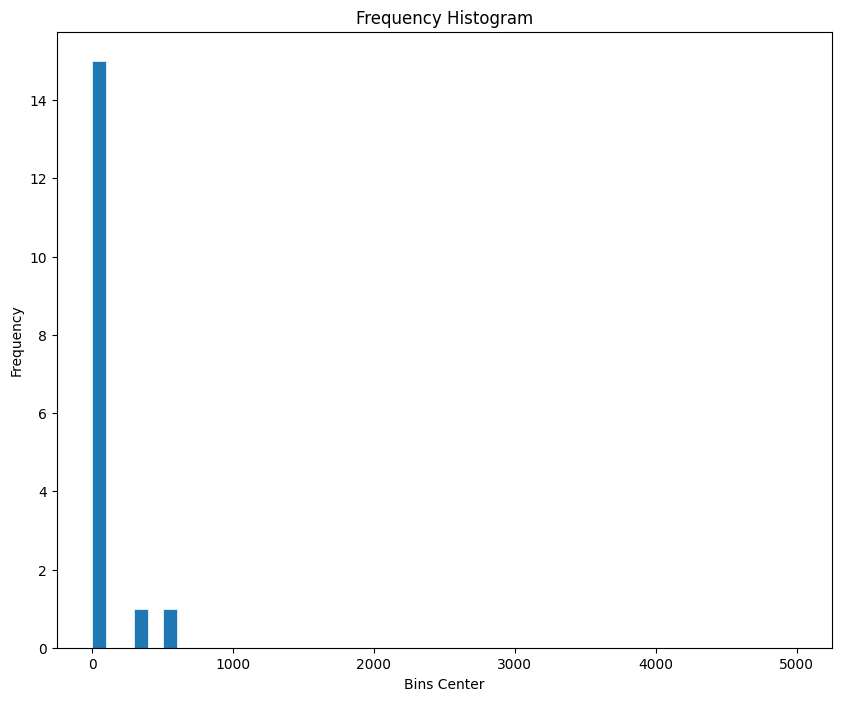

In [ ]:
# Assuming 'ana_copy_data' is your DataFrame containing the 'Calories' column
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(ana_copy_data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

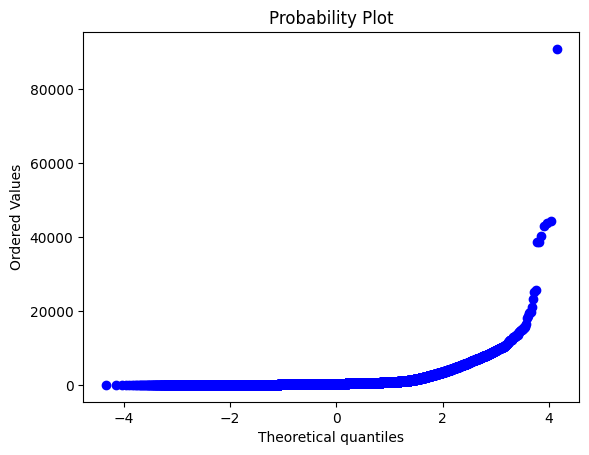

In [ ]:
import pandas as pd
import pylab
import scipy.stats as stats

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('recipes.csv') # Read the data into a pandas DataFrame

stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [ ]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [ ]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [ ]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [ ]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66720 entries, 0 to 97645
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               66720 non-null  int64  
 1   Name                   66720 non-null  object 
 2   CookTime               55203 non-null  object 
 3   PrepTime               66720 non-null  object 
 4   TotalTime              66720 non-null  object 
 5   RecipeIngredientParts  66720 non-null  object 
 6   Calories               66720 non-null  float64
 7   FatContent             66720 non-null  float64
 8   SaturatedFatContent    66720 non-null  float64
 9   CholesterolContent     66720 non-null  float64
 10  SodiumContent          66720 non-null  float64
 11  CarbohydrateContent    66720 non-null  float64
 12  FiberContent           66720 non-null  float64
 13  SugarContent           66720 non-null  float64
 14  ProteinContent         66720 non-null  float64
 15  RecipeI

In [ ]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.769295,0.607783,0.487596,0.504680,0.706823,0.451172,0.192284,0.679891
FatContent,0.769295,1.000000,0.768302,0.444192,0.388683,0.215718,0.188738,0.047069,0.463694
SaturatedFatContent,0.607783,0.768302,1.000000,0.523523,0.332197,0.170963,0.052668,0.076391,0.394390
CholesterolContent,0.487596,0.444192,0.523523,1.000000,0.343383,0.062545,-0.049520,-0.037348,0.690427
SodiumContent,0.504680,0.388683,0.332197,0.343383,1.000000,0.286121,0.256168,-0.045362,0.498234
CarbohydrateContent,0.706823,0.215718,0.170963,0.062545,0.286121,1.000000,0.575234,0.403663,0.230494
FiberContent,0.451172,0.188738,0.052668,-0.049520,0.256168,0.575234,1.000000,0.083437,0.245599
SugarContent,0.192284,0.047069,0.076391,-0.037348,-0.045362,0.403663,0.083437,1.000000,-0.120603
ProteinContent,0.679891,0.463694,0.394390,0.690427,0.498234,0.230494,0.245599,-0.120603,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [ ]:
prep_data

array([[-0.52356546, -0.89487959, -0.78836314, ...,  0.22978789,
         2.29001737, -0.66855586],
       [ 1.49090659,  1.12789171, -0.08147823, ...,  4.20970335,
         2.4937359 ,  1.26824476],
       [-0.89479758, -1.0924526 , -1.1276679 , ...,  0.57839362,
         0.94976388, -0.58692825],
       ...,
       [-0.47888522,  0.21529256, -0.84491393, ..., -0.64172645,
        -0.02594065, -0.83181109],
       [ 1.34583371,  3.35764425,  0.65368207, ..., -0.1769188 ,
         0.44582857, -0.57208686],
       [ 0.81132566,  0.77037864,  2.20882887, ..., -0.29312071,
         1.5716415 , -0.46819718]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [ ]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [ ]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([    0, 19679, 26112, 65388,  1362, 28669, 46372, 28131,  3409,
       46286])

In [ ]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
95667,101103,Baked Apple for One,PT20M,PT2M,PT22M,"c(""apple"", ""water"", ""sugar"", ""raisins"", ""cinna...",149.2,0.2,0.0,0.0,2.4,39.1,3.5,33.6,0.5,"c(""Preheat the oven (or toaster oven) to 375.""..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."
41757,45633,Chunky Applesauce,PT8H,PT10M,PT8H10M,"c(""apples"", ""water"", ""sugar"", ""cinnamon"")",159.1,0.3,0.1,0.0,2.4,41.8,4.4,35.5,0.5,"c(""Put all ingredients in crockpot."", ""Cover a..."
67769,72365,Microwave Applesauce,PT10M,PT15M,PT25M,"c(""apples"", ""water"", ""sugar"")",159.1,0.3,0.1,0.0,2.6,41.8,4.4,35.5,0.5,"c(""In a 2-quart casserole, combine apples and ..."
40954,44796,Banana Bonkers,NaN,PT20M,PT20M,"c(""bananas"", ""grapefruit juice"")",171.7,1.3,0.7,0.0,25.3,39.8,3.3,30.4,1.8,"c(""Puree bananas in a blender or food processo..."
5505,8474,Roasted Rosemary Skewered Figs,PT45M,PT10M,PT55M,"c(""fresh figs"", ""fresh rosemary"", ""maple syrup...",164.9,0.6,0.1,0.0,3.5,42.3,4.4,36.3,1.2,"c(""preheat oven to 400 degrees. Skewer 3 whole..."
67640,72234,Baked Figs in Port,PT30M,PT10M,PT40M,"c(""fresh figs"", ""port wine"", ""honey"", ""fresh r...",174.4,0.5,0.1,0.0,3.7,40.1,4.4,34.5,1.2,"c(""Preheat oven to 350°F."", ""Prick each fig wi..."


Accuracy: 0.945
Precision: [0.48       0.92929293 1.        ]
Recall: [1.         0.95833333 0.        ]
F1 Score: 0.9435897435897437
ROC AUC Score: 0.9455128205128206
Confusion Matrix:
 [[97  7]
 [ 4 92]]


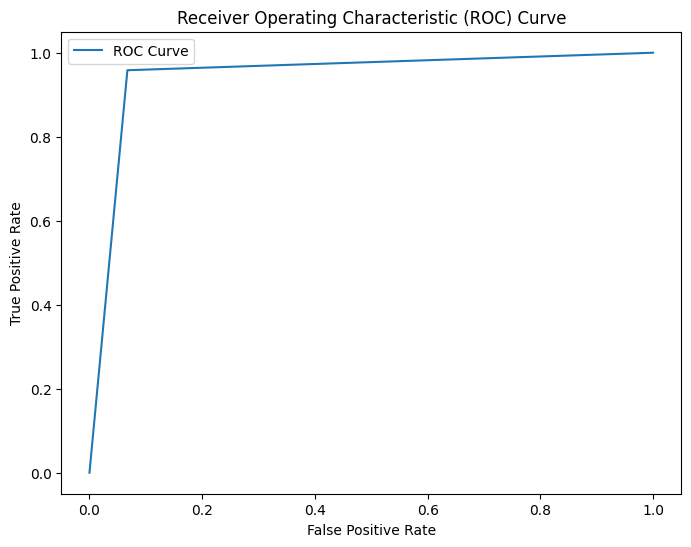

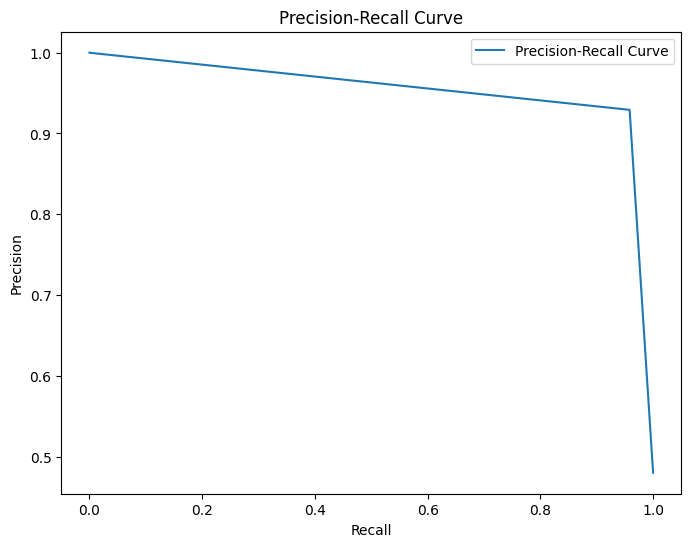

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97614,103101,Swirled Cheese Cupcakes (chocolate and Peanut ...,PT15M,PT20M,PT35M,"c(""butter"", ""granulated sugar"", ""ground cinnam...",160.2,11.2,6.7,53.1,97.2,12.1,0.2,9.8,3.3,"c(""Line muffin pans with liners (I use 6-cup m..."
97619,103106,Breakfast Pizzas,PT15M,PT20M,PT35M,"c(""bacon"", ""eggs"", ""cream cheese"", ""basil pest...",248.2,15.2,6.7,97.5,388.5,18.2,2.4,2.2,10.2,"c(""Heat oven to 375°F."", ""Spray Large cookie s..."
97627,103114,Allegheny Applesauce Bread,PT1H,PT30M,PT1H30M,"c(""butter"", ""honey"", ""eggs"", ""unsweetened appl...",204.7,9.3,5.3,55.6,204.1,28.6,3.1,11.5,4.5,"c(""Beat butter and honey together in mixing bo..."
97631,103118,Arabian Chocolate Cake,PT1H5M,PT40M,PT1H45M,"c(""butter"", ""sugar"", ""eggs"", ""all-purpose flou...",363.3,17.9,10.0,85.5,260.8,48.9,1.4,35.4,4.2,"c(""Preheat oven to 175 C; grease and flour a 2..."


In [ ]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)]
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

In [ ]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
95667,101103,Baked Apple for One,PT20M,PT2M,PT22M,"c(""apple"", ""water"", ""sugar"", ""raisins"", ""cinna...",149.2,0.2,0.0,0.0,2.4,39.1,3.5,33.6,0.5,"c(""Preheat the oven (or toaster oven) to 375.""..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."


In [ ]:
dataset.to_csv('dataset.csv',index=False)
dataset.to_json('dataset.json')

In [ ]:
def recommend_by_calories(dataframe, max_daily_fat, max_nutritional_values, ingredient_filter=None, params={'return_distance':False}):
    # Extract data based on maximum nutritional values and ingredient filter
    extracted_data = extract_data(dataframe, ingredient_filter, max_nutritional_values)

    # Scale the data
    prep_data, scaler = scaling(extracted_data)

    # Fit the Nearest Neighbors model
    neigh = nn_predictor(prep_data)

    # Build the pipeline
    pipeline = build_pipeline(neigh, scaler, params)
      # Create a test input with specified calories
    test_input = np.array([[0] * 9])  # Assuming the input shape is (1, 9) for 9 nutritional features
    test_input[0, 1] = max_daily_fat  # Set the calories

    # Get recipe recommendation based on test input
    recommended_recipe = apply_pipeline(pipeline, test_input, extracted_data)

    return recommended_recipe
# Example usage
recommended_recipe = recommend_by_calories(dataset, 100, max_list)
recommended_recipe.drop(columns=["RecipeId","CookTime","PrepTime","TotalTime"],inplace=True)

In [ ]:
recommended_recipe.head(5)

,Name,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
87063,Marinated Broccoli,"c(""fresh broccoli"", ""canola oil"", ""white vineg...",400.7,41.2,3.0,0.0,320.9,7.5,2.4,2.7,1.8,"c(""Wash and drain the broccoli, then cut the f..."
33325,Mint & Pistachio Pesto,"c(""fresh mint leaves"", ""canola oil"", ""garlic"",...",424.9,44.5,3.4,0.0,75.1,6.6,2.3,1.9,2.7,"c(""in a blender or food processor, combine oil..."
79431,Strawberry Poppy Seed Salad,"c(""canola oil"", ""cider"", ""water"", ""honey"", ""po...",372.9,37.2,2.8,0.0,197.1,11.2,2.1,8.0,1.2,"c(""In a blender or food processor, mix first e..."
79859,Vinaigrette Salad Dressing,"c(""wine vinegar"", ""lemon juice"", ""Dijon mustar...",368.0,41.0,3.4,0.0,84.1,1.3,0.3,0.4,0.4,"c(""Combine first 5 ingredients (vinegar- salt&..."
42784,Woodloch Salad,"c(""Red Delicious apples"", ""craisins"", ""walnuts...",451.6,45.5,5.0,7.1,141.9,10.2,1.8,7.3,3.7,"c(""Combine greens, fruits and nuts in large sa..."
